### Building a model to differentiate between noise and electrons from scratch

In this notebook, we will build a convolutional neural network to classify a signal as electron or noise. Therefore, we are facing a binary classification problem: electron or noise. This is the reason why we will have just one neuron in the output layer with sigmoidal activation.

First we import the data stored in a file called `eVSn.npz` composed of two variables: 'data' for the numpy arrays with energy or noise, and 'labels' where 1 stands for electron signal and 0 for noise.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
loaded = np.load('/Users/Silvia/Desktop/TFM/e_VS_n/eVSn.npz')

In [3]:
X = loaded['data']
y = loaded['labels']

Once the data is loaded, we split it into train and test partitions with sklearn:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)

(3942, 201, 147)


In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

print(X_train.shape)

(3942, 201, 147, 1)


Our network will be composed of a stack of alternate layers of `Conv2D` (with `relu` activation) and `MaxPooling2D` layers. It is important to note that the depth of feature maps progressively increases as we move through the neural network (from 32 to 128) while the size of feature maps decreases (from 200x146 to 70x7).

As we are attacking a binary classification problem (electron or noise), we are going to finish the network with a single unit (a dense layer of size 1) and with a sigmoid activation. This unit will encode the probability that our network is looking at one class or another.

In [6]:
import keras
from keras import layers, models, optimizers

Using TensorFlow backend.


In [7]:
window_y, window_x = 201,147

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(2,2), activation='relu', input_shape=(window_y, window_x, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units= 2050, activation='softmax'))
model.add(layers.Dense(units= 512, activation='softmax'))
model.add(layers.Dense(units= 1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 146, 32)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 73, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 14, 128)      

To compile, we will use the `RMSprop`(lr=1e-4) omptimizer. As we are facing the binary classification problem, we will use binary crossentropy as our loss function

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr= 1e-4),loss='binary_crossentropy', metrics=['acc'])

Now let's make the fit, where the input will be composed of X_train with the numpy arrays with energy of noise and y_train with the labels for noise or energy. We are going to run 30 epochs and use a validation split of 0.2 of the total training data

In [10]:
model.fit(X_train, y_train, epochs= 30, validation_split = 0.2)

Train on 3153 samples, validate on 789 samples
Epoch 1/30
3153/3153 [==============================] - 81s 26ms/step - loss: 0.6931 - acc: 0.6131 - val_loss: 0.6930 - val_acc: 0.9759
Epoch 2/30
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6929 - acc: 0.8195 - val_loss: 0.6928 - val_acc: 0.4968
Epoch 3/30
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6927 - acc: 0.5046 - val_loss: 0.6926 - val_acc: 0.4968
Epoch 4/30
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6925 - acc: 0.5046 - val_loss: 0.6924 - val_acc: 0.4968
Epoch 5/30
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6922 - acc: 0.5046 - val_loss: 0.6921 - val_acc: 0.4968
Epoch 6/30
3153/3153 [==============================] - 80s 25ms/step - loss: 0.6919 - acc: 0.5046 - val_loss: 0.6918 - val_acc: 0.4968
Epoch 7/30
3153/3153 [==============================] - 81s 26ms/step - loss: 0.6915 - acc: 0.5046 - val_loss: 0.6914 - val_acc: 0.4968
E

We save the model just trainned:

In [11]:
model.save('model_electron_or_noise_v1.h5')

Finally, we evaluate our model using the test dataset:

In [13]:
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print(X_test.shape)

(1314, 201, 147, 1)


In [14]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy with the model: {:5.2f}%'.format(100*acc))

1314/1314 [==============================] - 9s 7ms/step
Accuracy with the model: 97.18%


Now we predict:

In [31]:
y_predicted = model.predict(X_test)

And here we plot some results:

In [16]:
import matplotlib.pylab as plt

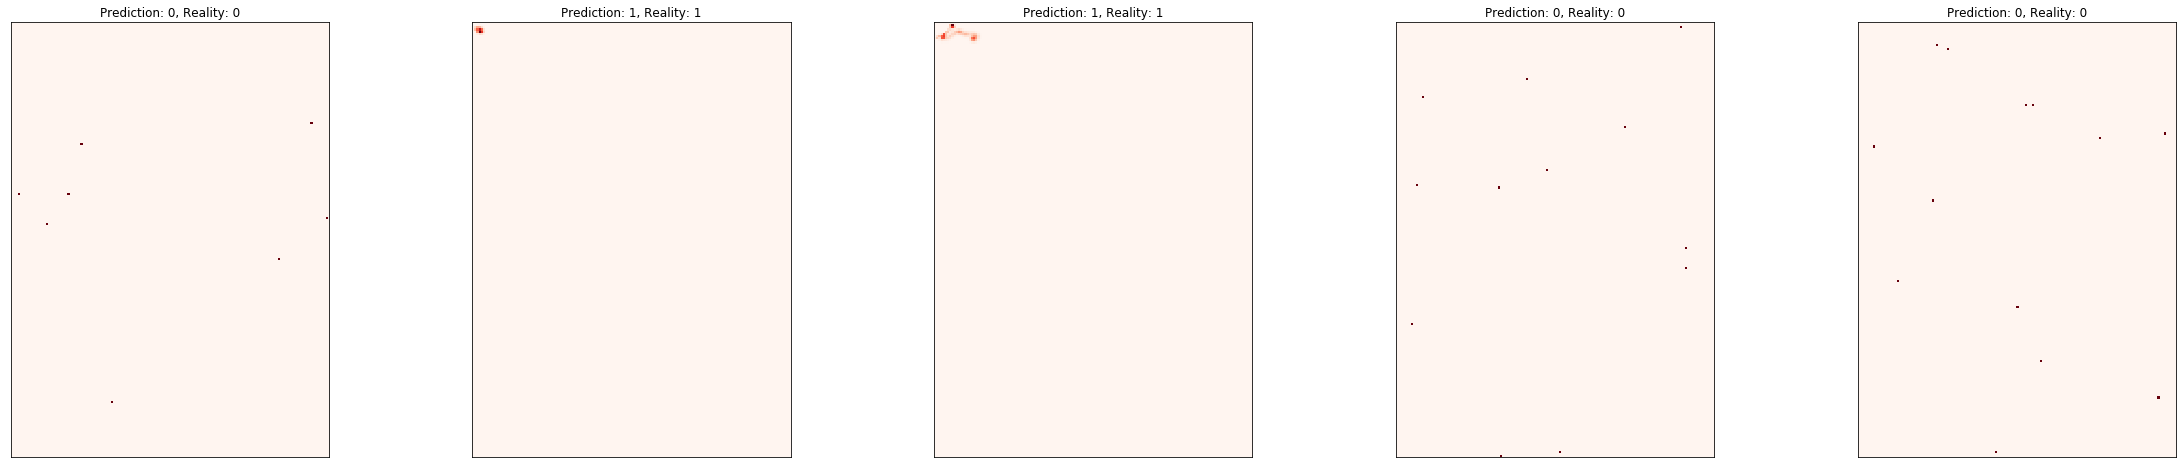

In [33]:
n = 5  # number of images to display
y_pred=0
plt.figure(figsize=(40, 8))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(window_y, window_x), cmap='Reds')
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if y_predicted[i]>0.5:
        y_pred = 1
    else:
        y_pred = 0
    
    ax.set_title('Prediction: {}, Reality: {}'.format(y_pred, y_test[i]))
plt.show()